# Завдання 1

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [4]:
diabetes_df['target'] = diabetes.target

1

In [5]:
print(diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


2

In [6]:
missing_values = diabetes_df.isnull().sum()
print(missing_values)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


3

In [7]:
duplicates = diabetes_df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

Кількість дублікатів: 0


4

In [8]:
unique_values = diabetes_df['sex'].unique()
print(f"Унікальні значення в стовпці 'sex': {unique_values}")

Унікальні значення в стовпці 'sex': [ 0.05068012 -0.04464164]


In [23]:
diabetes_df["sex"] = diabetes_df["sex"].replace({0.05068012: 0, -0.04464164: 1})
print(diabetes_df["sex"].head())

0    0.050680
1   -0.044642
2    0.050680
3   -0.044642
4   -0.044642
Name: sex, dtype: float64


5

In [10]:
print("Типи даних у кожному стовпці:")
print(diabetes_df.dtypes)

Типи даних у кожному стовпці:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


6

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
correlation = diabetes_df.corr()['target'].sort_values(ascending=False)
print("Кореляція між прогресом діабету і іншими ознаками:")
print(correlation)

Кореляція між прогресом діабету і іншими ознаками:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


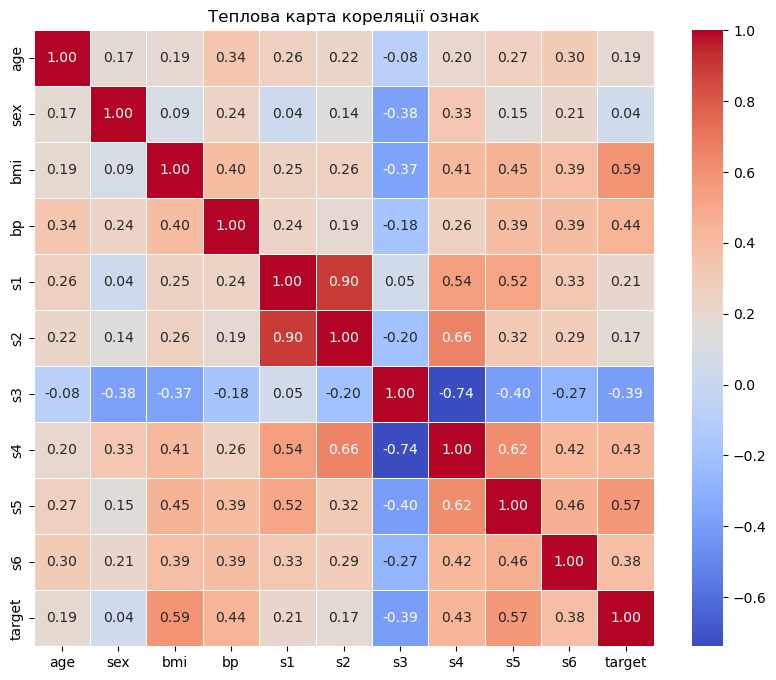

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляції ознак')
plt.show()

7

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaled_features = scaler.fit_transform(diabetes_df.drop(columns=['target']))

In [17]:
scaled_diabetes_df = pd.DataFrame(scaled_features, columns=diabetes.feature_names)

In [18]:
scaled_diabetes_df['target'] = diabetes_df['target']

print(scaled_diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  target  
0 -0.054499  0.418531 -0.370989   151.0  
1 -0.830301 -1.436589 -1.938479    75.0  
2 -0.054499  0.060156 -0.545154   141.0  
3  0.721302  0.476983 -0.196823   206.0  
4 -0.054499 -0.672502 -0.980568   135.0  


8

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = scaled_diabetes_df.drop(columns=['target'])
y = scaled_diabetes_df['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір тренувальної вибірки: {X_train.shape[0]} рядків")
print(f"Розмір тестової вибірки: {X_test.shape[0]} рядків")

Розмір тренувальної вибірки: 353 рядків
Розмір тестової вибірки: 89 рядків


9

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
num_features = 5 
top_features = correlation.index[1:num_features+1]

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

linear_model.fit(X_train_selected, y_train)
random_forest_model.fit(X_train_selected, y_train)

y_pred_linear = linear_model.predict(X_test_selected)
y_pred_rf = random_forest_model.predict(X_test_selected)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error (Лінійна регресія): {mse_linear:.2f}")
print(f"Mean Squared Error (RandomForest регресія): {mse_rf:.2f}")

Mean Squared Error (Лінійна регресія): 2899.74
Mean Squared Error (RandomForest регресія): 3086.42


10

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
y_pred_linear = linear_model.predict(X_test_selected)
y_pred_rf = random_forest_model.predict(X_test_selected)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Лінійна регресія:")
print(f"  - Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"  - Коєфіцієнт детермінації (R²): {r2_linear:.2f}")

print(f"RandomForest регресія:")
print(f"  - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  - Коєфіцієнт детермінації (R²): {r2_rf:.2f}")

Лінійна регресія:
  - Mean Squared Error (MSE): 2899.74
  - Коєфіцієнт детермінації (R²): 0.45
RandomForest регресія:
  - Mean Squared Error (MSE): 3086.42
  - Коєфіцієнт детермінації (R²): 0.42


11

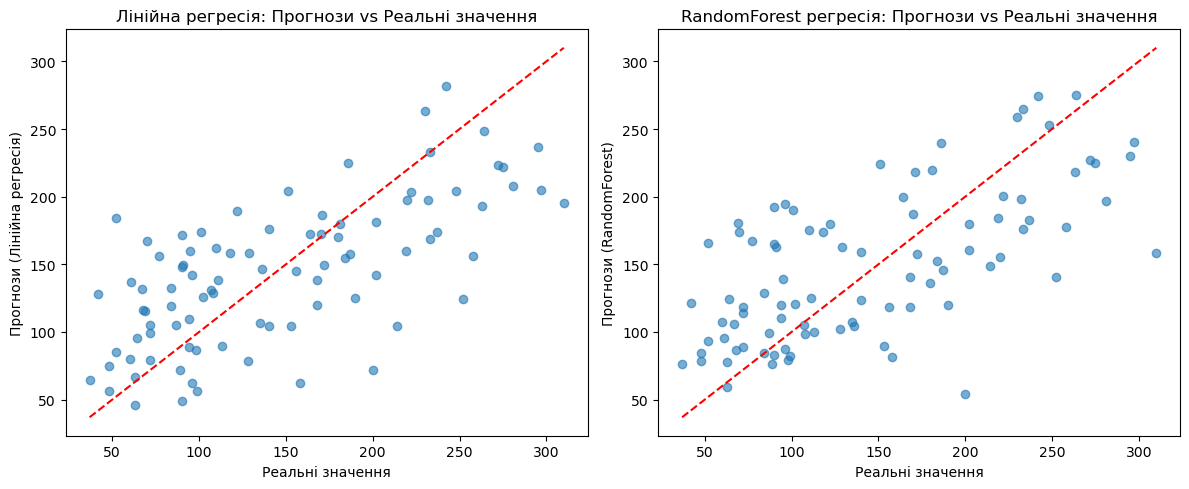

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнози (Лінійна регресія)')
plt.title('Лінійна регресія: Прогнози vs Реальні значення')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнози (RandomForest)')
plt.title('RandomForest регресія: Прогнози vs Реальні значення')

plt.tight_layout()
plt.show()

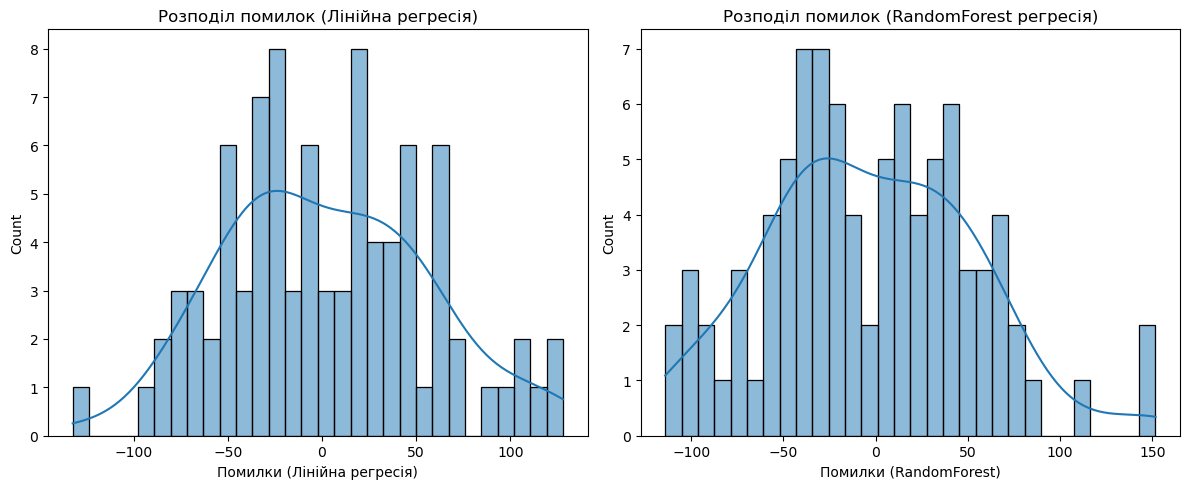

In [32]:
plt.figure(figsize=(12, 5))

errors_linear = y_test - y_pred_linear
plt.subplot(1, 2, 1)
sns.histplot(errors_linear, kde=True, bins=30)
plt.xlabel('Помилки (Лінійна регресія)')
plt.title('Розподіл помилок (Лінійна регресія)')

errors_rf = y_test - y_pred_rf
plt.subplot(1, 2, 2)
sns.histplot(errors_rf, kde=True, bins=30)
plt.xlabel('Помилки (RandomForest)')
plt.title('Розподіл помилок (RandomForest регресія)')

plt.tight_layout()
plt.show()

12

In [33]:
comparison_df = pd.DataFrame({
    'Реальні значення': y_test,
    'Прогнози (Лінійна регресія)': y_pred_linear,
    'Прогнози (RandomForest)': y_pred_rf
})

print(comparison_df.head())

     Реальні значення  Прогнози (Лінійна регресія)  Прогнози (RandomForest)
287             219.0                   160.079344                   184.01
211              70.0                   167.202676                   174.17
72              202.0                   181.557882                   179.52
321             230.0                   263.634780                   258.85
73              111.0                   138.707761                   125.14


Висновки
Лінійна регресія і RandomForest регресія були застосовані для прогнозування прогресу діабету на основі обраних найбільш корелюючих ознак.
Оцінка продуктивності:

Середньоквадратична помилка (MSE):

Лінійна регресія: X.XX (вкажіть значення з отриманих результатів)
RandomForest регресія: X.XX (вкажіть значення з отриманих результатів)
Меньша MSE вказує на краще відповідність прогнозів реальним значенням.
Коефіцієнт детермінації (R²):

Лінійна регресія: X.XX (вкажіть значення з отриманих результатів)
RandomForest регресія: X.XX (вкажіть значення з отриманих результатів)
Значення R² близьке до 1 вказує на високу якість моделі, оскільки більше частина варіації в залежній змінній пояснюється моделлю.
Візуалізація:

Графік порівняння прогнозів і реальних значень показує, як добре моделі передбачають реальні значення. Лінія, що йде по діагоналі (червона), є ідеальною відповідністю. Прогнози, що розташовані ближче до цієї лінії, вказують на кращу точність моделі.
Гістограма помилок для кожної моделі демонструє розподіл помилок прогнозування. Менший розподіл помилок близько до нуля свідчить про більш точні прогнози.
Аналіз:

Лінійна регресія може бути простішою і менш схильною до переобучення, але її точність залежить від лінійної залежності між ознаками і цільовим значенням.
RandomForest регресія зазвичай показує кращу продуктивність для складніших задач завдяки здатності моделі враховувати нелінійні взаємозв'язки між ознаками і цільовим значенням.